# Import Librarys and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/ALAMEDA_PD_tremor_dataset.csv")

In [ ]:
pd.set_option('display.max_columns',None)

# Set colors

In [ ]:
custom_palette =["#1B263B","#34495E","#5DADE2","#85C1E9","#AED6F1"]
custom_palette2 =["#1B263B","#85C1E9"]

In [ ]:
from matplotlib.colors import ListedColormap
colors = [custom_palette[0], custom_palette[1],custom_palette[2],custom_palette[3]]

# EDA

In [ ]:
data.head()

,start_timestamp,end_timestamp,subject_id,Magnitude_mean,Magnitude_std_dev,Magnitude_var,Magnitude_avg_diff_mean,Magnitude_above_mean_rt,Magnitude_median,Magnitude_med_dev,Magnitude_iqr,Magnitude_skewness,Magnitude_kurtosis,Magnitude_min,Magnitude_max,Magnitude_maxmin_diff,Magnitude_peaks_rt,Magnitude_rest_rt,Magnitude_ssc_rt,Magnitude_rms,Magnitude_energy,Magnitude_sampen,Magnitude_dfa,PC1_mean,PC1_mean_abs,PC1_std_dev,PC1_var,PC1_avg_diff_mean,PC1_above_mean_rt,PC1_median,PC1_med_dev,PC1_iqr,PC1_skewness,PC1_kurtosis,PC1_min,PC1_max,PC1_maxmin_diff,PC1_neg_rt,PC1_pos_rt,PC1_zero_cross_rt,PC1_peaks_rt,PC1_rest_rt,PC1_ssc_rt,PC1_rms,PC1_energy,PC1_sampen,PC1_dfa,Magnitude_fft_mean,Magnitude_fft_std_dev,Magnitude_fft_var,Magnitude_fft_avg_diff_mean,Magnitude_fft_above_mean_rt,Magnitude_fft_median,Magnitude_fft_med_dev,Magnitude_fft_iqr,Magnitude_fft_skewness,Magnitude_fft_kurtosis,Magnitude_fft_min,Magnitude_fft_max,Magnitude_fft_maxmin_diff,Magnitude_fft_peaks_rt,Magnitude_fft_rest_rt,Magnitude_fft_ssc_rt,Magnitude_fft_rms,Magnitude_fft_tot_power,Magnitude_fft_dom_freq_rt,Magnitude_fft_energy,Magnitude_fft_dom_freq,Magnitude_fft_pw_ar_dom_freq,Magnitude_fft_entropy,Magnitude_fft_flatness,PC1_fft_mean,PC1_fft_std_dev,PC1_fft_var,PC1_fft_avg_diff_mean,PC1_fft_above_mean_rt,PC1_fft_median,PC1_fft_med_dev,PC1_fft_iqr,PC1_fft_skewness,PC1_fft_kurtosis,PC1_fft_min,PC1_fft_max,PC1_fft_maxmin_diff,PC1_fft_peaks_rt,PC1_fft_rest_rt,PC1_fft_ssc_rt,PC1_fft_rms,PC1_fft_tot_power,PC1_fft_dom_freq_rt,PC1_fft_energy,PC1_fft_dom_freq,PC1_fft_pw_ar_dom_freq,PC1_fft_entropy,PC1_fft_flatness,Constancy_of_rest,Kinetic_tremor,Postural_tremor,Rest_tremor
0,15:00.0,15:20.5,11,0.026806,0.030615,0.000937,0.018907,0.329102,0.017788,0.010122,0.024215,4.905112,41.975663,0.000164,0.389060,0.388896,0.147949,0.996094,0.295898,0.040692,0.001656,0.435199,1.056523,-0.000004,0.014534,0.027887,0.000778,0.014534,0.485840,-0.000217,0.006641,0.013244,1.228254,32.417605,-0.269603,0.326559,0.596162,0.514160,0.485840,0.133789,0.085938,0.998535,0.171875,0.027887,0.000778,0.337741,0.266619,0.002372,0.046406,0.002154,0.003928,0.061463,2.520449e-05,2.413191e-05,0.000483,31.017984,977.325338,5.868363e-09,1.471561,1.471561,0.357073,0.999024,0.714146,0.046467,0.236743,6.215862,4.857954,0,0,3.515421,0.016937,0.000777,0.002679,7.176830e-06,0.001265,0.151220,9.797962e-09,6.521362e-09,1.353408e-05,6.370242,55.689219,2.002414e-09,0.034885,0.034885,0.181463,1.0,0.361951,0.002789,0.077541,0.449896,1.591135,5.810547,0.535356,6.922100,0.000267,1,0,0,0
1,15:10.2,15:30.7,11,0.013529,0.013011,0.000169,0.008200,0.345215,0.009880,0.004664,0.010736,4.201000,32.384367,0.000739,0.172558,0.171819,0.152344,1.000000,0.304688,0.018770,0.000352,0.634916,1.001258,0.000005,0.005602,0.010317,0.000106,0.005602,0.497070,-0.000022,0.003407,0.006792,2.490251,39.620418,-0.070313,0.133512,0.203825,0.502930,0.497070,0.139160,0.087891,1.000000,0.175293,0.010317,0.000106,0.494615,0.250598,0.000535,0.011745,0.000138,0.000904,0.065366,5.199438e-06,5.032426e-06,0.000085,31.596728,1003.470302,5.059279e-10,0.374842,0.374842,0.299512,0.999024,0.600000,0.011757,0.053378,7.022418,1.095313,0,0,3.057381,0.013811,0.000106,0.000324,1.052411e-07,0.000170,0.167805,3.882831e-09,3.288251e-09,6.422181e-06,4.909814,30.818171,2.567321e-10,0.003401,0.003401,0.209756,1.0,0.419512,0.000341,0.010614,0.320393,0.217790,6.542969,0.075632,7.140168,0.000547,1,0,0,0
2,15:20.5,15:40.9,11,0.007208,0.004947,0.000024,0.003428,0.369629,0.006022,0.002229,0.004693,2.318882,8.673266,0.000188,0.043305,0.043118,0.158203,1.000000,0.316406,0.008742,0.000076,0.921368,0.977662,0.000008,0.002951,0.003916,0.000015,0.002951,0.503418,0.000036,0.002331,0.004653,-0.419369,2.543328,-0.025140,0.012732,0.037873,0.496582,0.503418,0.150879,0.091797,1.000000,0.183105,0.003916,0.000015,0.703026,0.189970,0.000128,0.003322,0.000011,0.000226,0.032195,8.924115e-07,8.594200e-07,0.000014,31.922039,1017.997894,1.009577e-09,0.106395,0.106395,0.329756,1.000000,0.659512,0.0

In [ ]:
data.shape

(4151, 99)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4151 entries, 0 to 4150
Data columns (total 99 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   start_timestamp               4151 non-null   object 
 1   end_timestamp                 4151 non-null   object 
 2   subject_id                    4151 non-null   int64  
 3   Magnitude_mean                4151 non-null   float64
 4   Magnitude_std_dev             4151 non-null   float64
 5   Magnitude_var                 4151 non-null   float64
 6   Magnitude_avg_diff_mean       4151 non-null   float64
 7   Magnitude_above_mean_rt       4151 non-null   float64
 8   Magnitude_median              4151 non-null   float64
 9   Magnitude_med_dev             4151 non-null   float64
 10  Magnitude_iqr                 4151 non-null   float64
 11  Magnitude_skewness            4151 non-null   float64
 12  Magnitude_kurtosis            4151 non-null   float64
 13  Mag

In [ ]:
data.describe()

,subject_id,Magnitude_mean,Magnitude_std_dev,Magnitude_var,Magnitude_avg_diff_mean,Magnitude_above_mean_rt,Magnitude_median,Magnitude_med_dev,Magnitude_iqr,Magnitude_skewness,Magnitude_kurtosis,Magnitude_min,Magnitude_max,Magnitude_maxmin_diff,Magnitude_peaks_rt,Magnitude_rest_rt,Magnitude_ssc_rt,Magnitude_rms,Magnitude_energy,Magnitude_sampen,Magnitude_dfa,PC1_mean,PC1_mean_abs,PC1_std_dev,PC1_var,PC1_avg_diff_mean,PC1_above_mean_rt,PC1_median,PC1_med_dev,PC1_iqr,PC1_skewness,PC1_kurtosis,PC1_min,PC1_max,PC1_maxmin_diff,PC1_neg_rt,PC1_pos_rt,PC1_zero_cross_rt,PC1_peaks_rt,PC1_rest_rt,PC1_ssc_rt,PC1_rms,PC1_energy,PC1_sampen,PC1_dfa,Magnitude_fft_mean,Magnitude_fft_std_dev,Magnitude_fft_var,Magnitude_fft_avg_diff_mean,Magnitude_fft_above_mean_rt,Magnitude_fft_median,Magnitude_fft_med_dev,Magnitude_fft_iqr,Magnitude_fft_skewness,Magnitude_fft_kurtosis,Magnitude_fft_min,Magnitude_fft_max,Magnitude_fft_maxmin_diff,Magnitude_fft_peaks_rt,Magnitude_fft_rest_rt,Magnitude_fft_ssc_rt,Magnitude_fft_rms,Magnitude_fft_tot_power,Magnitude_fft_dom_freq_rt,Magnitude_fft_energy,Magnitude_fft_dom_freq,Magnitude_fft_pw_ar_dom_freq,Magnitude_fft_entropy,Magnitude_fft_flatness,PC1_fft_mean,PC1_fft_std_dev,PC1_fft_var,PC1_fft_avg_diff_mean,PC1_fft_above_mean_rt,PC1_fft_median,PC1_fft_med_dev,PC1_fft_iqr,PC1_fft_skewness,PC1_fft_kurtosis,PC1_fft_min,PC1_fft_max,PC1_fft_maxmin_diff,PC1_fft_peaks_rt,PC1_fft_rest_rt,PC1_fft_ssc_rt,PC1_fft_rms,PC1_fft_tot_power,PC1_fft_dom_freq_rt,PC1_fft_energy,PC1_fft_dom_freq,PC1_fft_pw_ar_dom_freq,PC1_fft_entropy,PC1_fft_flatness,Constancy_of_rest,Kinetic_tremor,Postural_tremor,Rest_tremor
count,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4.151000e+03,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4.151000e+03,4.151000e+03,4151.000000,4151.000000,4151.000000,4.151000e+03,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.0,4151.0,4151.000000,4151.000000,4151.000000,4151.000000,4.151000e+03,4151.000000,4151.000000,4.151000e+03,4.151000e+03,4.151000e+03,4151.000000,4151.000000,4.151000e+03,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000
mean,9.460371,0.052362,0.050635,0.005066,0.033773,0.350425,0.037290,0.018581,0.043723,2.738626,14.730768,0.001739,0.463716,0.461977,0.138980,0.948425,0.277958,0.073819,0.010472,0.604106,1.049166,-6.271725e-07,0.031965,0.052067,0.005348,0.031965,0.499913,-0.000024,0.019120,0.038255,0.065596,12.228674,-0.332825,0.344050,0.676874,0.500050,0.499950,0.133382,0.082951,0.987594,0.165899,0.052067,0.005348,0.501968,0.283724,0.015863,0.348737,0.556920,0.027682,0.040957,6.832782e-05,6.617791e-05,0.001734,30.827809,967.372120,7.869626e-08,11.071386,11.071386,0.318680,0.995404,0.637794,0.349115,1.583201,7.193595,32.487232,0.0,0.0,2.647706,0.008406,0.005343,0.019971,3.014853e-03,0.008802,0.149386,3.327699e-06,1.764340e-06,1.230902e-04,5.856459,49.559957,5.931956e-07,0.254704,0.254704,0.172890,0.994715,0.345260,0.020702,0.533248,0.418646,10.942234,5.159654,3.564846,6.889171,0.003853,0.758853,0.042159,0.210793,0.379427
std,4.925205,0.051622,0.050032,0.010192,0.033322,0.069697,0.039725,0.019996,0.045629,1.663926,21.373073,0.002184,0.499930,0.498882,0.016223,0.091634,0.032444,0.070883,0.019455,0.349374,0.113072,1.835859e-04,0.032074,0.051358,0.010418,0.032075,0.011307,0.001095,0.020623,0.041284,0.974

In [ ]:
data.columns

Index(['start_timestamp', 'end_timestamp', 'subject_id', 'Magnitude_mean',
       'Magnitude_std_dev', 'Magnitude_var', 'Magnitude_avg_diff_mean',
       'Magnitude_above_mean_rt', 'Magnitude_median', 'Magnitude_med_dev',
       'Magnitude_iqr', 'Magnitude_skewness', 'Magnitude_kurtosis',
       'Magnitude_min', 'Magnitude_max', 'Magnitude_maxmin_diff',
       'Magnitude_peaks_rt', 'Magnitude_rest_rt', 'Magnitude_ssc_rt',
       'Magnitude_rms', 'Magnitude_energy', 'Magnitude_sampen',
       'Magnitude_dfa', 'PC1_mean', 'PC1_mean_abs', 'PC1_std_dev', 'PC1_var',
       'PC1_avg_diff_mean', 'PC1_above_mean_rt', 'PC1_median', 'PC1_med_dev',
       'PC1_iqr', 'PC1_skewness', 'PC1_kurtosis', 'PC1_min', 'PC1_max',
       'PC1_maxmin_diff', 'PC1_neg_rt', 'PC1_pos_rt', 'PC1_zero_cross_rt',
       'PC1_peaks_rt', 'PC1_rest_rt', 'PC1_ssc_rt', 'PC1_rms', 'PC1_energy',
       'PC1_sampen', 'PC1_dfa', 'Magnitude_fft_mean', 'Magnitude_fft_std_dev',
       'Magnitude_fft_var', 'Magnitude_fft_avg_diff

In [ ]:
nulls=data.isnull().sum().sum()
print(f"Total Numbers of Null Values = {nulls} ")

Total Numbers of Null Values = 0 


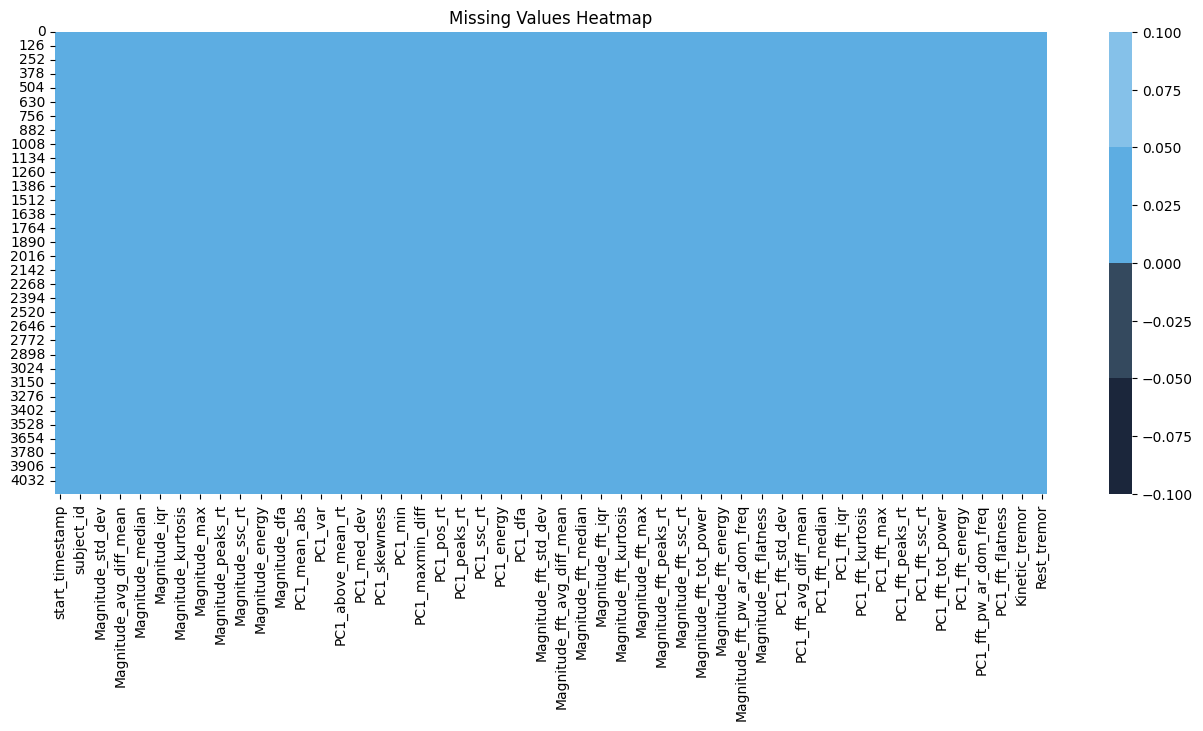

In [ ]:
plt.figure(figsize=(16,6))
cmap_custom = ListedColormap(colors)
sns.heatmap(data.isnull(), cmap=cmap_custom)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
dups=data.duplicated().sum()
print(f"Total Numbers of duplicated Rows = {dups} ")

Total Numbers of duplicated Rows = 0 


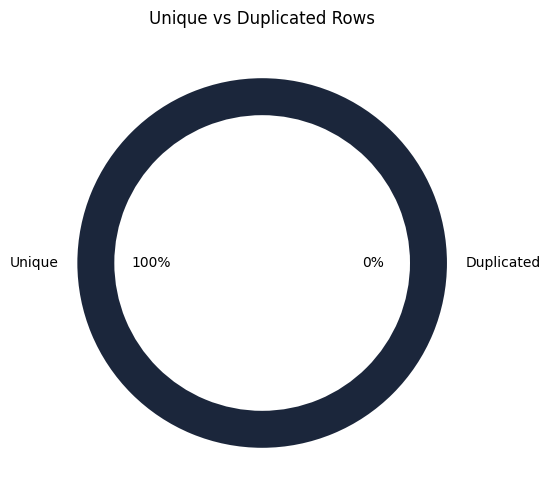

In [ ]:
unique = len(data) - dups
sizes = [unique, dups]
labels = ['Unique', 'Duplicated']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', wedgeprops={'width':0.2}, colors=custom_palette)
plt.title("Unique vs Duplicated Rows")
plt.show()

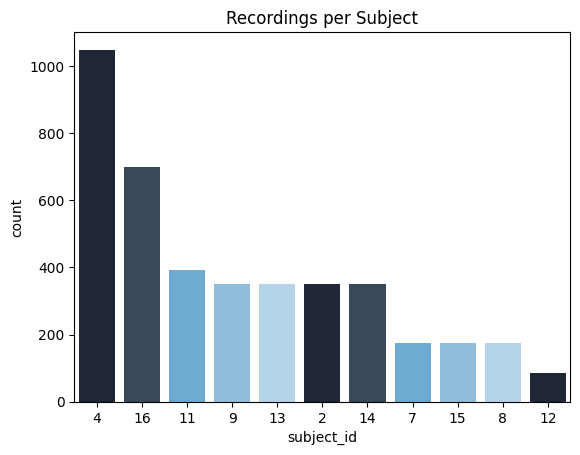

In [ ]:
# distribution of subjects
sns.countplot(data=data, x='subject_id', order=data['subject_id'].value_counts().index,
              palette=custom_palette)
plt.title('Recordings per Subject')
plt.show()

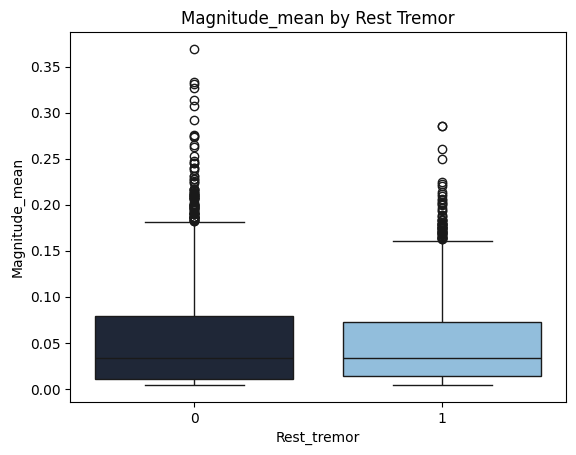

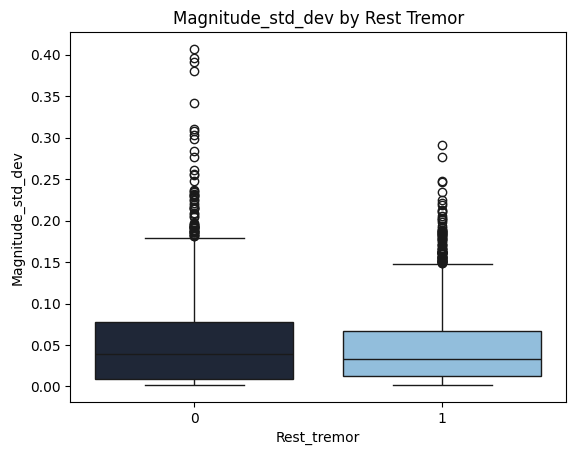

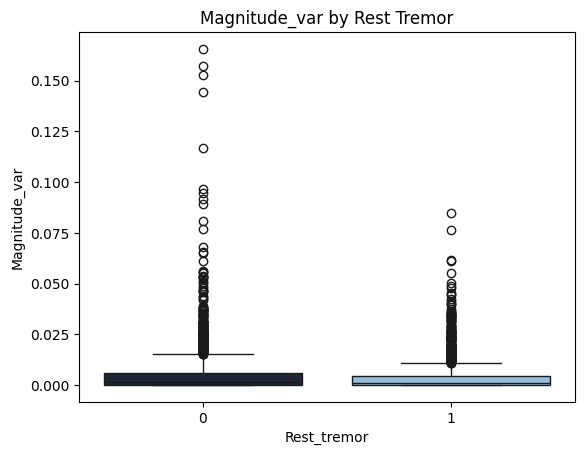

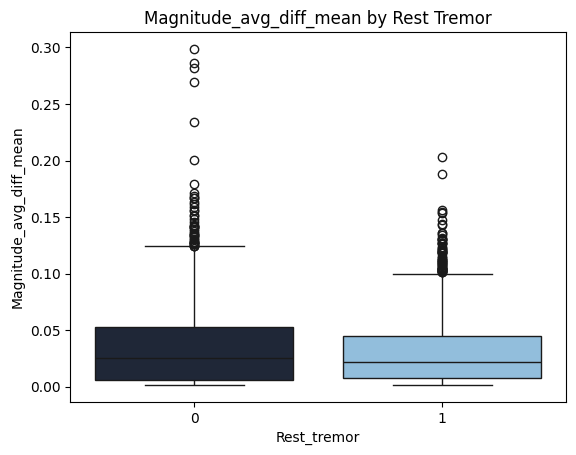

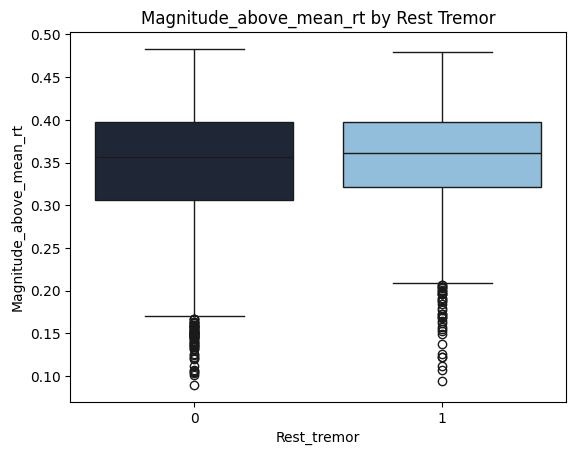

In [ ]:
mag_cols = [col for col in data.columns if col.startswith('Magnitude_') or col.startswith('PC1_')]

for col in mag_cols[:5]:
    plt.figure()
    sns.boxplot(data=data, x='Rest_tremor', y=col ,palette=custom_palette2)
    plt.title(f'{col} by Rest Tremor')
    plt.show()

In [ ]:
data['subject_id'].value_counts()

,count
subject_id,
4,1050
16,700
11,392
9,350
13,350
2,350
14,350
7,175
15,175


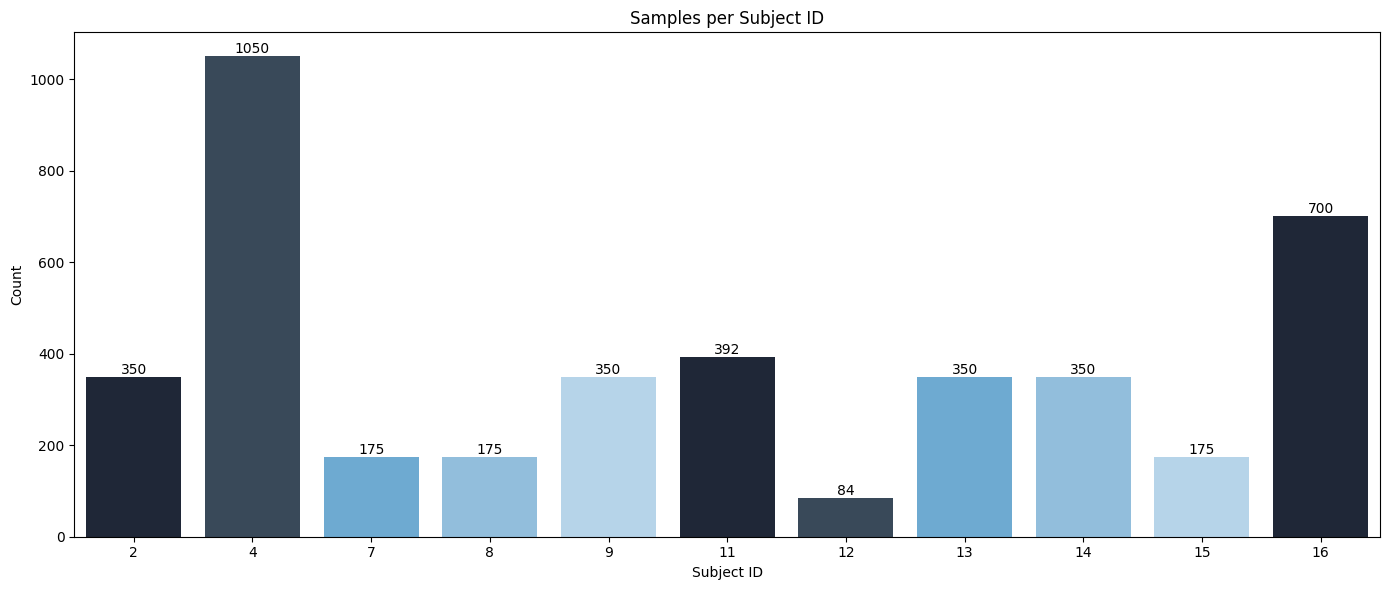

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = data['subject_id'].value_counts()

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=counts.index, y=counts.values, palette=custom_palette)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Samples per Subject ID")
plt.xlabel("Subject ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

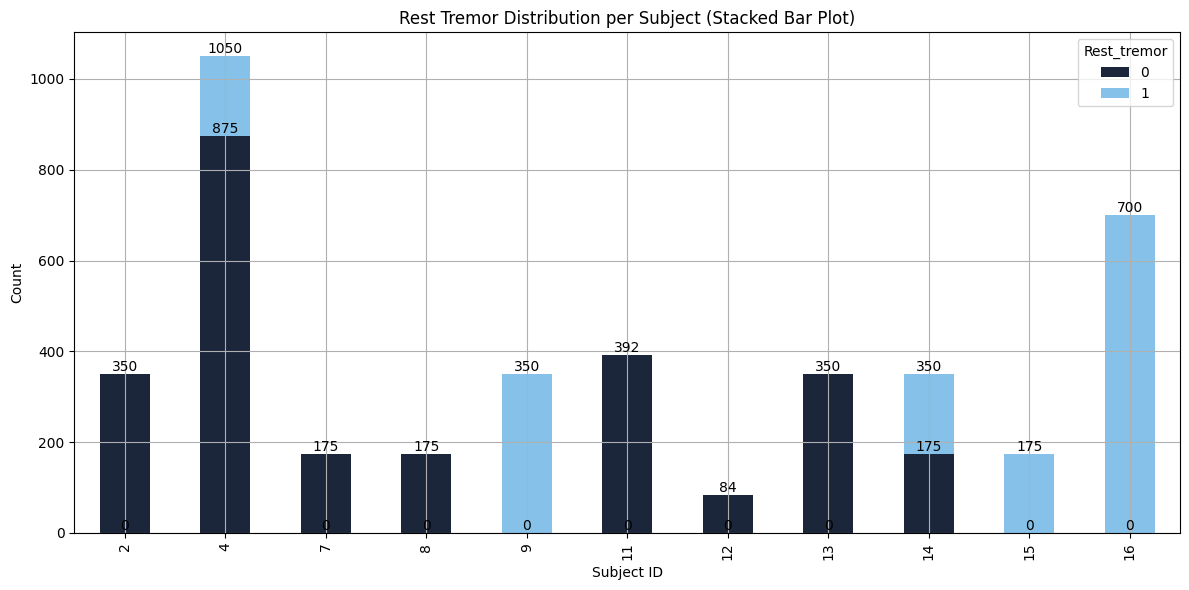

In [ ]:
crosstab = pd.crosstab(data['subject_id'], data['Rest_tremor'])

plt.figure(figsize=(12, 6))
ax = crosstab.plot(kind='bar',stacked=True,figsize=(12, 6),grid=True,color=custom_palette2)

for container in ax.containers:
    ax.bar_label(container)
plt.title("Rest Tremor Distribution per Subject (Stacked Bar Plot)")
plt.xlabel("Subject ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
crosstab_df = pd.DataFrame(crosstab)
crosstab_df

Rest_tremor,0,1
subject_id,,
2,350,0
4,875,175
7,175,0
8,175,0
9,0,350
11,392,0
12,84,0
13,350,0
14,175,175


# Target Columns EDA

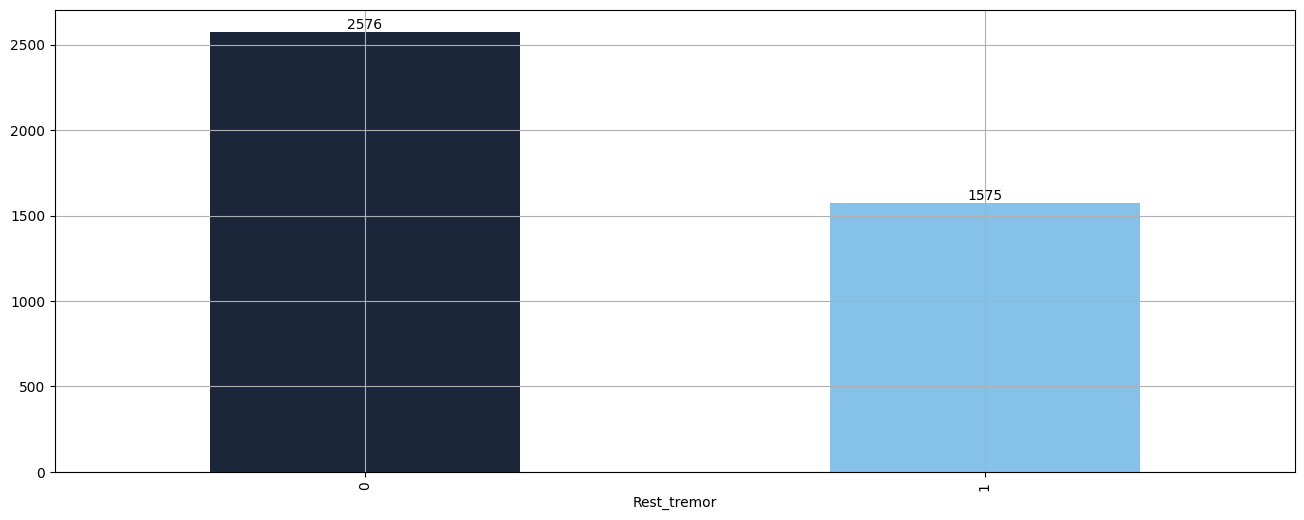

In [ ]:
ax = data['Rest_tremor'].value_counts().plot(kind='bar', figsize=(16,6), grid=True,color=custom_palette2)
ax.bar_label(ax.containers[0])
plt.show()


In [ ]:
data['Rest_tremor'].value_counts()

,count
Rest_tremor,
0,2576
1,1575


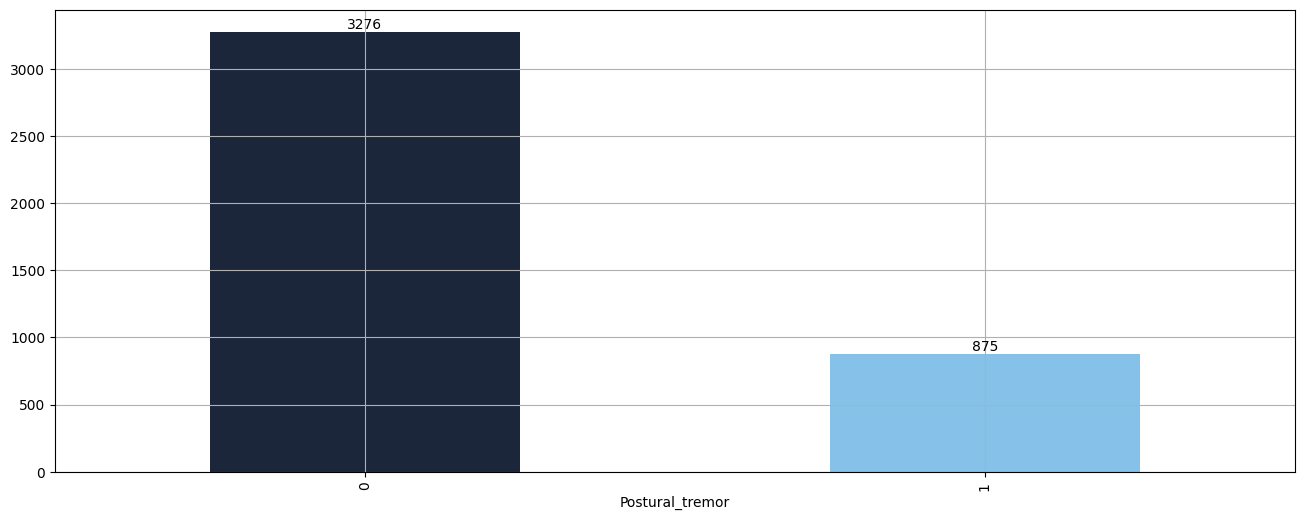

In [ ]:
ax = data['Postural_tremor'].value_counts().plot(kind='bar', figsize=(16,6), grid=True,color=custom_palette2)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
data['Postural_tremor'].value_counts()

,count
Postural_tremor,
0,3276
1,875


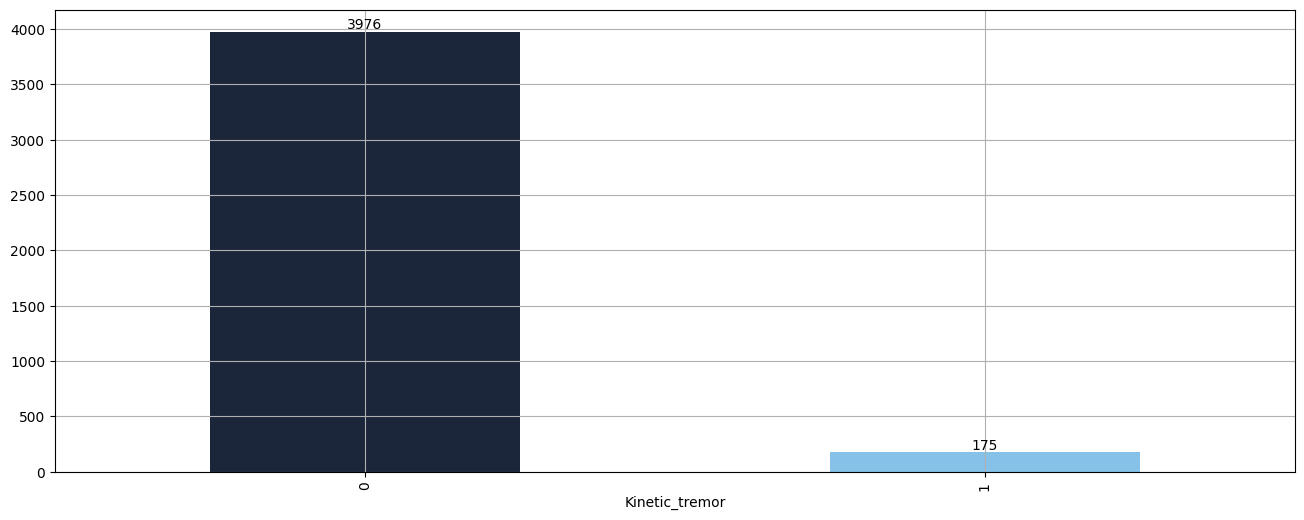

In [ ]:
ax = data['Kinetic_tremor'].value_counts().plot(kind='bar', figsize=(16,6), grid=True,color=custom_palette2)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
data['Kinetic_tremor'].value_counts()

,count
Kinetic_tremor,
0,3976
1,175


Kinetic_tremor( رعشة أثناء الحركة ) → 3976 (class 0) vs 175 (class 1) → strong imbalance

Postural_tremor( رعشة أثناء رفع اليد ) → 3276 (class 0) vs 875 (class 1) → moderate imbalance

Rest_tremor( رعشة أثناء الراحة ) → 2576 (class 0) vs 1575 (class 1) → balanced

# prosses Test

In [ ]:
data=data.drop(['start_timestamp', 'end_timestamp', 'subject_id'],axis=True)

In [ ]:
data.columns

Index(['Magnitude_mean', 'Magnitude_std_dev', 'Magnitude_var',
       'Magnitude_avg_diff_mean', 'Magnitude_above_mean_rt',
       'Magnitude_median', 'Magnitude_med_dev', 'Magnitude_iqr',
       'Magnitude_skewness', 'Magnitude_kurtosis', 'Magnitude_min',
       'Magnitude_max', 'Magnitude_maxmin_diff', 'Magnitude_peaks_rt',
       'Magnitude_rest_rt', 'Magnitude_ssc_rt', 'Magnitude_rms',
       'Magnitude_energy', 'Magnitude_sampen', 'Magnitude_dfa', 'PC1_mean',
       'PC1_mean_abs', 'PC1_std_dev', 'PC1_var', 'PC1_avg_diff_mean',
       'PC1_above_mean_rt', 'PC1_median', 'PC1_med_dev', 'PC1_iqr',
       'PC1_skewness', 'PC1_kurtosis', 'PC1_min', 'PC1_max', 'PC1_maxmin_diff',
       'PC1_neg_rt', 'PC1_pos_rt', 'PC1_zero_cross_rt', 'PC1_peaks_rt',
       'PC1_rest_rt', 'PC1_ssc_rt', 'PC1_rms', 'PC1_energy', 'PC1_sampen',
       'PC1_dfa', 'Magnitude_fft_mean', 'Magnitude_fft_std_dev',
       'Magnitude_fft_var', 'Magnitude_fft_avg_diff_mean',
       'Magnitude_fft_above_mean_rt', 'Mag

هاخد اكتر من نسخه من الداتا علشان نجرب اكتر من عمليه بروسيسينج و نشوف مين احسن فى النتاج

In [ ]:
data_copy0=data.copy()

In [ ]:
#copy data to save it
data_copy1=data.copy()
data_copy2=data.copy()
data_copy3=data.copy()
data_copy4=data.copy()
data_copy5=data.copy()

# test5

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


data = data_copy1

target_col = 'Rest_tremor'
X = data.drop(columns=[target_col])
y = data[target_col]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

input_dim = X_train_pca.shape[1]

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_pca, y_train, epochs=30, batch_size=32, validation_split=0.1)


y_pred_prob = model.predict(X_test_pca).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {rec:.4f}')


Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5909 - loss: 0.6508 - val_accuracy: 0.6867 - val_loss: 0.5326
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7446 - loss: 0.4887 - val_accuracy: 0.7831 - val_loss: 0.4188
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7843 - loss: 0.4266 - val_accuracy: 0.8102 - val_loss: 0.3888
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.3942 - val_accuracy: 0.8193 - val_loss: 0.3748
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7937 - loss: 0.3890 - val_accuracy: 0.8253 - val_loss: 0.3616
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8094 - loss: 0.3723 - val_accuracy: 0.8313 - val_loss: 0.3577
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8084 - loss: 0.3807 - val_accuracy: 0.8253 - val_loss: 0.3644
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8037 - loss: 0.3677 - val_accuracy: 0.8373 - val_loss:

# test4

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import mutual_info_classif, SelectKBest

from sklearn.metrics import accuracy_score, f1_score, recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout


data = data_copy2




target_col = 'Rest_tremor'
X = data.drop(columns=[target_col])
y = data[target_col]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Scaling باستخدام RobustScaler لتحمل الـ outliers
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. معالجة عدم التوازن باستخدام ADASYN
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train_scaled, y_train)

# 7. اختيار أهم الـ Features باستخدام Mutual Information
k = 30  # عدد الميزات المهمة التي نريد اختيارها
selector = SelectKBest(mutual_info_classif, k=k)
X_train_sel = selector.fit_transform(X_train_res, y_train_res)
X_test_sel = selector.transform(X_test_scaled)

# 8. بناء موديل Neural Network متوسط العمق مع BatchNorm و Dropout
input_dim = X_train_sel.shape[1]

model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. تدريب الموديل
model.fit(X_train_sel, y_train_res, epochs=40, batch_size=32, validation_split=0.1)

# 10. التقييم
y_pred_prob = model.predict(X_test_sel).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {rec:.4f}')


Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5584 - loss: 0.7461 - val_accuracy: 0.5318 - val_loss: 0.7007
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6297 - loss: 0.6244 - val_accuracy: 0.8565 - val_loss: 0.5281
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7028 - loss: 0.5469 - val_accuracy: 0.7835 - val_loss: 0.5546
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7249 - loss: 0.5262 - val_accuracy: 0.8682 - val_loss: 0.4733
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7452 - loss: 0.4829 - val_accuracy: 0.7929 - val_loss: 0.5219
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.4713 - val_accuracy: 0.9153 - val_loss: 0.3669
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7378 - loss: 0.4855 - val_accuracy: 0.8847 - val_loss: 0.4130
Epoch 8/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.4587 - val_accuracy: 0.

# test3

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import accuracy_score, f1_score, recall_score

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

data = data_copy3


target_col = 'Rest_tremor'
X = data.drop(columns=[target_col])
y = data[target_col]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. حساب أوزان الكلاسات (Class Weights)
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# 7. تطبيق PCA لتقليل الأبعاد (مثلاً لـ 40 بعد)
pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 8. بناء Autoencoder للـ Feature Extraction
input_dim = X_train_pca.shape[1]
encoding_dim = 20  # عدد الأبعاد المضغوطة في الـ Autoencoder

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_pca, X_train_pca,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_split=0.1,
                verbose=0)

# 9. استخراج الـ encoded features
X_train_encoded = encoder.predict(X_train_pca)
X_test_encoded = encoder.predict(X_test_pca)

# 10. Feature Selection باستخدام RFE مع Logistic Regression
lr = LogisticRegression(max_iter=1000)
rfe_selector = RFE(lr, n_features_to_select=15, step=1)
X_train_rfe = rfe_selector.fit_transform(X_train_encoded, y_train)
X_test_rfe = rfe_selector.transform(X_test_encoded)

# 11. بناء Neural Network باستخدام الـ features المختارة
model = Sequential()
model.add(Dense(64, input_dim=X_train_rfe.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 12. تدريب الموديل مع Class Weights
model.fit(X_train_rfe, y_train,
          epochs=40,
          batch_size=32,
          validation_split=0.1,
          class_weight=class_weight_dict)

# 13. التقييم
y_pred_prob = model.predict(X_test_rfe).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {rec:.4f}')


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 1/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5975 - loss: 0.6988 - val_accuracy: 0.7078 - val_loss: 0.5809
Epoch 2/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.6012 - val_accuracy: 0.6867 - val_loss: 0.5643
Epoch 3/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7005 - loss: 0.5429 - val_accuracy: 0.7771 - val_loss: 0.4682
Epoch 4/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7266 - loss: 0.5057 - val_accuracy: 0.7831 - val_loss: 0.4600
Epoch 5/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.4824 - val_accuracy: 0.7892 - val_loss: 0.4468
Epoch 6/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7396 - loss: 0.4769 - val_accuracy: 0.7801 - val_loss: 0.4654
Epoch 7/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.4704 - val_accuracy: 0.7952 - val_loss: 0.4490
Epoch 8/40
94/94 ━━━━━━━━━━━━━━━━━━━━

# test2

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

import pywt  # لتحويل Wavelet

from sklearn.metrics import accuracy_score, f1_score, recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. تحميل الداتا
data = data_copy4

# 3. تحديد الهدف والميزات
target_col = 'Rest_tremor'  # عدّل حسب بياناتك
X = data.drop(columns=[target_col])
y = data[target_col]

# 4. تقسيم الداتا
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Scaling باستخدام MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Feature Extraction: Wavelet Transform على كل Feature (Modified to preserve sample count)
def wavelet_features(X_data, wavelet='db1', level=1):
    n_samples, n_features = X_data.shape
    new_feature_matrix = np.zeros((n_samples, n_features))

    for i in range(n_features):
        signal = X_data[:, i]

        # Decompose the signal
        coeffs = pywt.wavedec(signal, wavelet, level=level)

        # Reconstruct the signal from the coefficients
        # This effectively filters/denoises the signal, maintaining its length
        reconstructed_signal = pywt.waverec(coeffs, wavelet)

        # The reconstructed signal might have a slightly different length due to padding in DWT.
        # We need to ensure it matches n_samples.
        if len(reconstructed_signal) > n_samples:
            reconstructed_signal = reconstructed_signal[:n_samples]
        elif len(reconstructed_signal) < n_samples:
            # Pad if it's shorter (e.g., zero-padding)
            padding = n_samples - len(reconstructed_signal)
            reconstructed_signal = np.pad(reconstructed_signal, (0, padding), 'constant')

        new_feature_matrix[:, i] = reconstructed_signal

    return new_feature_matrix

X_train_wavelet = wavelet_features(X_train_scaled)
X_test_wavelet = wavelet_features(X_test_scaled)

# 7. معالجة عدم التوازن باستخدام SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_wavelet, y_train)

# 8. Feature Selection باستخدام Lasso (LogisticRegression مع L1)
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lasso.fit(X_train_res, y_train_res)

selector = SelectFromModel(lasso, prefit=True)
X_train_sel = selector.transform(X_train_res)
X_test_sel = selector.transform(X_test_wavelet)

# 9. بناء Neural Network أعمق مع Dropout
input_dim = X_train_sel.shape[1]

model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 10. تدريب الموديل
model.fit(X_train_sel, y_train_res, epochs=50, batch_size=32, validation_split=0.1)

# 11. التقييم
y_pred_prob = model.predict(X_test_sel).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {rec:.4f}')

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5860 - loss: 0.6555 - val_accuracy: 0.9490 - val_loss: 0.4676
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7060 - loss: 0.5137 - val_accuracy: 0.8374 - val_loss: 0.5250
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7382 - loss: 0.4760 - val_accuracy: 0.8835 - val_loss: 0.4501
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7601 - loss: 0.4538 - val_accuracy: 0.7961 - val_loss: 0.5144
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - loss: 0.4407 - val_accuracy: 0.8325 - val_loss: 0.4898
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7722 - loss: 0.4370 - val_accuracy: 0.8495 - val_loss: 0.4780
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7770 - loss: 0.4204 - val_accuracy: 0.9199 - val_loss: 0.3617
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.4254 - val_accuracy: 0.

# test1

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = data_copy5



target_col = 'Rest_tremor'
X = data.drop(columns=[target_col])
y = data[target_col]

# 4. تقسيم الداتا
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Scaling باستخدام MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. حساب أوزان الكلاسات (Class Weights)
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# 7. تقليل الأبعاد باستخدام PCA (مثلاً 30 بعد)
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 8. Feature Selection باستخدام RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# اختيار أهم 20 Feature
top_k = 20
selected_indices = indices[:top_k]

X_train_selected = X_train_pca[:, selected_indices]
X_test_selected = X_test_pca[:, selected_indices]

# 9. بناء Neural Network بسيط
input_dim = X_train_selected.shape[1]

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 10. تدريب الموديل مع Class Weights
model.fit(X_train_selected, y_train,
          epochs=30,
          batch_size=32,
          validation_split=0.1,
          class_weight=class_weight_dict)

# 11. التقييم
y_pred_prob = model.predict(X_test_selected).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {rec:.4f}')


Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6722 - loss: 0.6411 - val_accuracy: 0.7711 - val_loss: 0.4496
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7597 - loss: 0.4388 - val_accuracy: 0.7952 - val_loss: 0.3929
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7813 - loss: 0.4036 - val_accuracy: 0.7952 - val_loss: 0.3951
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7760 - loss: 0.4041 - val_accuracy: 0.8133 - val_loss: 0.3812
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7890 - loss: 0.3839 - val_accuracy: 0.7982 - val_loss: 0.3919
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 0.3765 - val_accuracy: 0.8163 - val_loss: 0.3685
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8048 - loss: 0.3653 - val_accuracy: 0.8343 - val_loss: 0.3642
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8206 - loss: 0.3577 - val_accuracy: 0.8163 - val_loss:

# test0

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1. تحميل الداتا
data = data_copy0



# 3. تحديد الهدف والميزات
target_col = 'Rest_tremor'  # عدّل حسب بياناتك
X = data.drop(columns=[target_col])
y = data[target_col]

# 4. تقسيم الداتا
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Scaling باستخدام MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. حساب أوزان الكلاسات (Class Weights)
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# 7. زيادة عدد مكونات PCA لتجربة تأثيرها (مثلاً 40 بعد)
pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 8. Feature Selection باستخدام RandomForest (اختيار أهم 25 Feature)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_pca, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_k = 30
selected_indices = indices[:top_k]

X_train_selected = X_train_pca[:, selected_indices]
X_test_selected = X_test_pca[:, selected_indices]




# 9. بناء Neural Network مع BatchNorm و Dropout + زيادة حجم الطبقات
input_dim = X_train_selected.shape[1]

model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 10. Early Stopping لمنع الـ overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 11. تدريب الموديل
history = model.fit(
    X_train_selected, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=2
)

# 12. التقييم
y_pred_prob = model.predict(X_test_selected).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {rec:.4f}')

Epoch 1/100
94/94 - 3s - 29ms/step - accuracy: 0.6630 - loss: 0.5732 - val_accuracy: 0.5904 - val_loss: 0.6769
Epoch 2/100
94/94 - 0s - 4ms/step - accuracy: 0.7145 - loss: 0.4943 - val_accuracy: 0.6114 - val_loss: 0.6651
Epoch 3/100
94/94 - 0s - 3ms/step - accuracy: 0.7296 - loss: 0.4721 - val_accuracy: 0.6596 - val_loss: 0.5731
Epoch 4/100
94/94 - 0s - 3ms/step - accuracy: 0.7480 - loss: 0.4538 - val_accuracy: 0.7440 - val_loss: 0.4863
Epoch 5/100
94/94 - 0s - 4ms/step - accuracy: 0.7493 - loss: 0.4438 - val_accuracy: 0.7500 - val_loss: 0.4368
Epoch 6/100
94/94 - 0s - 4ms/step - accuracy: 0.7597 - loss: 0.4338 - val_accuracy: 0.7620 - val_loss: 0.4129
Epoch 7/100
94/94 - 0s - 4ms/step - accuracy: 0.7507 - loss: 0.4317 - val_accuracy: 0.7771 - val_loss: 0.3972
Epoch 8/100
94/94 - 0s - 4ms/step - accuracy: 0.7570 - loss: 0.4271 - val_accuracy: 0.7861 - val_loss: 0.3883
Epoch 9/100
94/94 - 0s - 3ms/step - accuracy: 0.7721 - loss: 0.4155 - val_accuracy: 0.7982 - val_loss: 0.3816
Epoch 10/